In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib3

In [2]:
train = pd.read_csv("order_products__train.csv")
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [3]:
prior = pd.read_csv("order_products__prior.csv")
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [4]:
orders = pd.read_csv("orders.csv")
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [15]:
products = pd.read_csv("products.csv")
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
departments = pd.read_csv("departments.csv")
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
aisles = pd.read_csv("aisles.csv")
aisles.head()


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [11]:
#On an average, about 59% of the products in an order are re-ordered products.
# percentage of re-orders in prior set #
def count(x):
    return len(x)


prior_reorder = prior["reordered"].sum() / prior.shape[0]
print(prior_reorder)
# percentage of re-orders in train set #
train_reorder = train["reordered"].sum() / train.shape[0]
print(train_reorder)

0.5896974667922161
0.5985944127509629


In [12]:
prior_no_reorder = prior.groupby(["order_id"]).reordered.aggregate("sum").reset_index()
prior_no_reorder.reordered.loc[prior_no_reorder.reordered>1] = 1
print(prior_no_reorder.reordered.value_counts() / prior_no_reorder.shape[0])
print('\n')
train_no_reorder = train.groupby(["order_id"]).reordered.aggregate("sum").reset_index()
train_no_reorder.reordered.loc[train_no_reorder.reordered>1] = 1
print(train_no_reorder.reordered.value_counts() / train_no_reorder.shape[0])

1    0.879151
0    0.120849
Name: reordered, dtype: float64


1    0.93444
0    0.06556
Name: reordered, dtype: float64


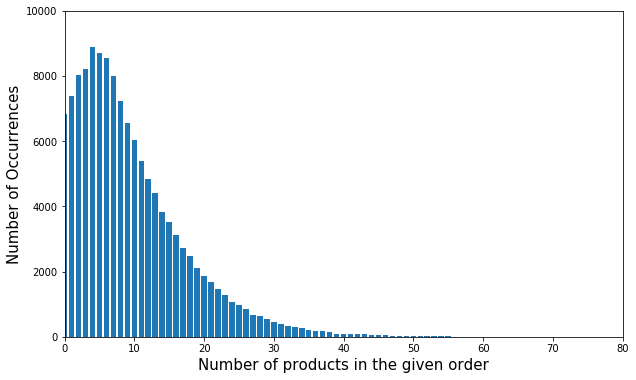

In [13]:
cart = train.groupby(["order_id"]).add_to_cart_order.aggregate(np.max).reset_index()
yaxis = cart.groupby(["add_to_cart_order"]).add_to_cart_order.aggregate(count)
xaxis = [i for i in range(len(yaxis.tolist()))]

plt.figure(figsize=(10,6))
plt.bar(xaxis,yaxis.tolist())
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('Number of products in the given order', fontsize=15)
plt.xlim(0,80)
plt.ylim(0,10000)
plt.show()



It is a right tailed distribution and we can see that the  max value at 5

In [16]:
new_prior = pd.merge(prior, products, on='product_id', how='left')
new_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [17]:
new_prior = pd.merge(new_prior, aisles, on='aisle_id', how='left')
new_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [18]:
prod_freq = new_prior['product_name'].value_counts().reset_index().head(10)
prod_freq.columns = ['product_name', 'frequency_count']
prod_freq

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


we can see that banana is the product which is mostly purchased. And we can also see that most of them are organic products and they are either fruits or vegetables.

In [19]:
aisl_freq = new_prior['aisle'].value_counts().reset_index().head(10)
aisl_freq.columns = ["aisle", "frequency"]
aisl_freq

,aisle,frequency
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


As mentioned in the above inference, that fruits and vegetables are the most purchased, is supported here , by this result.

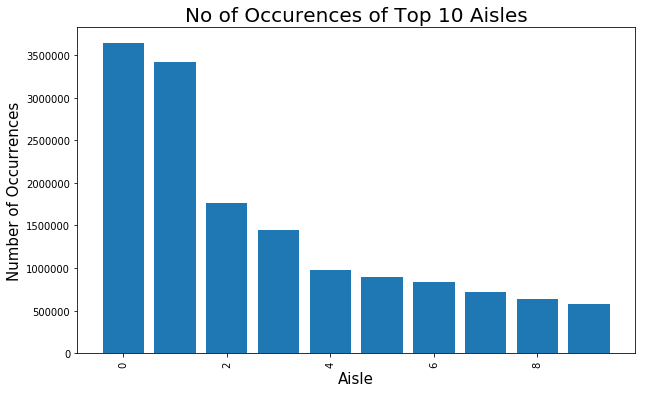

In [21]:
#Based on previous section
plt.figure(figsize=(10,6))
plt.bar(aisl_freq.index, aisl_freq["frequency"])
plt.ylabel("Number of Occurrences", fontsize=15)
plt.xlabel("Aisle", fontsize=15)
plt.title("No of Occurences of Top 10 Aisles", fontsize=20)
plt.xticks(rotation="vertical")
plt.show()